ICPE 643 HW, Problem #3
Matt Lee

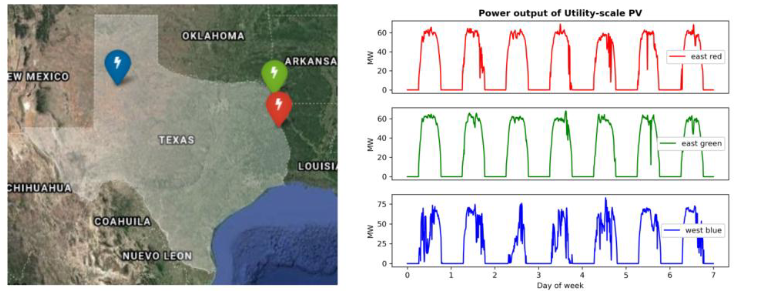

Problem Description:

You are given in solar.csv some 7-day time-series data for real photovoltaic (PV) power output
at 3 different locations in Texas. The three locations are labelled in the file as 'east red', 'east
green' and 'west blue' to match the map and plot above.
a. Reading files: Extract the 3 time-series measurements, and store them as three different
variables in Python, say x_red , x_green and x_blue.
b. Plotting Time-series: Generate a time-series plot similar to the one on the right above.
What could be the reasons why the blue signal looks quite different from the other two?
c. Cross-correlation: Using np.correlate, compute the cross-correlation between all pairs of
time-series (i.e. redgreen, red-blue, green-blue). Finally, what conclusions can you draw?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Read solar datafile
solar_df = pd.read_csv('solar.csv')
solar_df

,east red,east green,west blue
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
2011,0.0,0.0,0.0
2012,0.0,0.0,0.0
2013,0.0,0.0,0.0
2014,0.0,0.0,0.0


In [10]:
x_red = solar_df['east red']
x_green = solar_df['east green']
x_blue = solar_df['west blue']

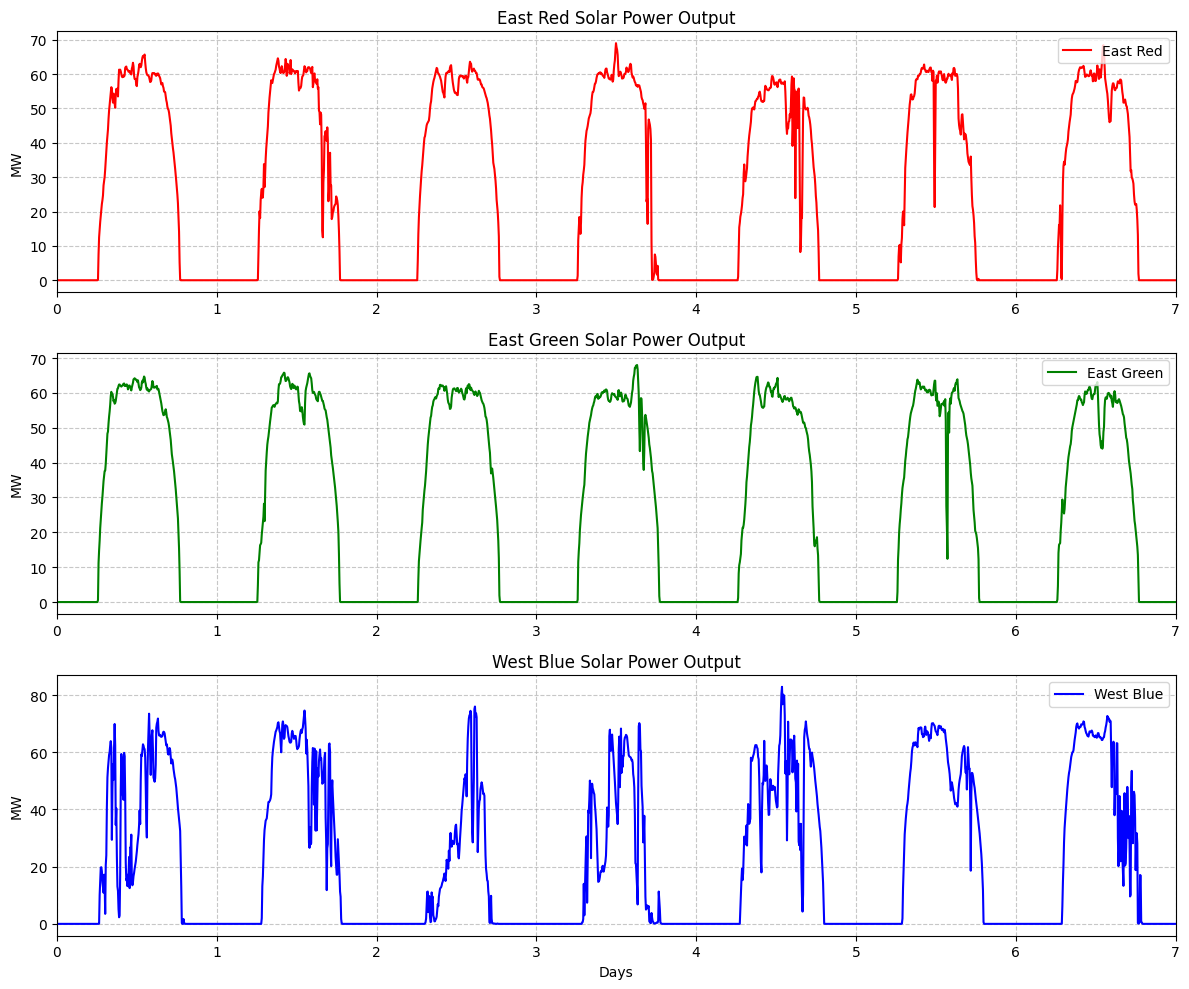

In [ ]:
# Create time indices for the x-axis (5-minute intervals over 7 days)
days = 7
minutes_per_day = 24 * 60
interval = 5
total_points = days * minutes_per_day // interval
x = np.linspace(0, days, total_points)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

ax1.plot(x, x_red, color='red', label='East Red')
ax1.set_ylabel('MW')
ax1.set_title('East Red Solar Power Output')
ax1.legend(loc='upper right')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.set_xlim(0, days)

ax2.plot(x, x_green, color='green', label='East Green')
ax2.set_ylabel('MW')
ax2.set_title('East Green Solar Power Output')
ax2.legend(loc='upper right')
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.set_xlim(0, days)

ax3.plot(x, x_blue, color='blue', label='West Blue')
ax3.set_xlabel('Days')
ax3.set_ylabel('MW')
ax3.set_title('West Blue Solar Power Output')
ax3.legend(loc='upper right')
ax3.grid(True, linestyle='--', alpha=0.7)
ax3.set_xlim(0, days)

# Set x-axis ticks for all subplots
for axis in [ax1, ax2, ax3]:
    axis.set_xticks(np.arange(0, days + 1, 1))

plt.tight_layout()
plt.show()

The blue signal could be significantly different from the other two series since it is in a different geographic location (West vs East Texas).  So, there could have been cloudy weather in West Texas, but not East Texas, during the time this data was recorded.  The weather pattern would explain why the production output is more erratic, and also dips lower during parts of the day.

In [23]:
red_green = np.correlate(x_red, x_green, mode='valid')
green_blue = np.correlate(x_green, x_blue, mode='valid')
blue_red = np.correlate(x_blue, x_red, mode='valid')
print("Correlation between East Red and East Green:", red_green)
print("Correlation between East Green and West Blue:", green_blue)
print("Correlation between West Blue and East Red:", blue_red)

Correlation between East Red and East Green: [2709942.25]
Correlation between East Green and West Blue: [2387416.46]
Correlation between West Blue and East Red: [2319777.11]


From this cross-correlation result where the signals overlap completely (the 'valid' mode), it seems clear that the East Red and East Green signals have the highest cross-correlation, while the West Blue signal has a lower correlation result with the other two.  This makes sense considering that we already knew West Blue output looked quite different, possibly explained due to different weather patterns (cloudier at the West location).